<a id="MapReduce"></a>

# Lab 11 - MapReduce Coding Solutions

***

In this lab session we will learn
   * Mapper, Reducer and Applications of MapReduce
   * Python methods for MapReduce
   * Some functions
   
   
Highly recommended to look into the white paper from Google - http://static.googleusercontent.com/media/research.google.com/en/us/archive/mapreduce-osdi04.pdf   
   
Datasets:

[1.] https://www.ssa.gov/oact/babynames/limits.html

Resources for further readings

[1.] https://engineering.purdue.edu/~puma/pumabenchmarks.htm - Classical Mapreduce examples/projects

[2.] http://michaelnielsen.org/blog/write-your-first-mapreduce-program-in-20-minutes/ - blog on MapReduce

[3.] https://cs.nyu.edu/~mwalfish/classes/16sp/hw/hw3.html - MapReduce with mrjob (working on VM)

[4.] https://www.youtube.com/watch?v=30RaNpaupj0&list=PLtzRLOcrx9SS1Ir6_viv-yLJd0PX3GR5O - Video explaining Mapreduce applications:- 


[5.] https://mapr.com/blog/5-google-projects-changed-big-data-forever/ -  Google Projects that changed the latitude of Big Data 

### **MapReduce** is a programming model for performing parallel processing on large datasets.

In [1]:
from __future__ import division
import math, random, re, datetime
from collections import defaultdict, Counter
from functools import partial

### WordCount - classical way to count

In [2]:
def tokenize(message):
    message = message.lower()                       # convert to lowercase
    all_words = re.findall("[a-z0-9']+", message)   # extract the words
    return (set(all_words))                           # remove duplicates

Here the tokenizer is used to split the data

In [3]:
def word_count_old(documents):
    """ Word count without using map reduce"""
    return Counter (word for document in documents 
                    for word in tokenize(document))

#### Add text to the document list and observe the output from function

In [4]:
documents=["data science","big data", 'data Mining', "Data Visualization"]
word_counts=word_count_old(documents)
print(word_counts)

Counter({'data': 4, 'science': 1, 'mining': 1, 'visualization': 1, 'big': 1})


### 1. Read through Chapter 24 of the resource (shared in the lab repository), create a basic function for mapper and reducer for counting the number of words from a list. Print output from each functions

### Mapper

* A **Mapper** function returns each item into zero or more key-value pairs.
* Map function in python and Map function described here are two different aspects

In [5]:
# The mapper functions maps the task
def wc_mapper(document):
    print ('*****Mapper output******')
    """for each word in document, emit (word,1)"""
    for word in tokenize(document):
        print (word, 1)
        yield (word, 1)

### Reducer

* A Reducer function aggregates the *values* corresponding to each *key* i.e., produces output values by grouping together values from each corresponding key.
* Aggregation can be anything say summing or fincing maximum or mathematical function
* A Reducer loops through the list of key and values and aggregates it. Say sum or max or min or other function
        

In [6]:
# The reducer function collects the results
def wc_reducer(word, counts):
    """sum up the counts for a word"""
    yield (word, sum(counts))

### Calling Mapper and reducer

In [7]:
# The below function feeds the input data to mapper, consoildates the output from mapper (i.e., collector) 
# to reducer function and finally output the result from reducer. Map_reduce function!
def word_count(documents):
    """count the words in the input documents using MapReduce"""
    
    # place to store grouped values
    collector = defaultdict(list)
    
    for document in documents:
        for word, count in wc_mapper(document):
            collector[word].append(count)
            
    print ('\n*****Collector Output*****')
    # groups the data, also similar to "shuffle and sort", which is key, list of value
    print(collector)
    # add a statement to print the collector here
            
    return [output
            # replace items() with iteritems() if you get an error
           for word, counts in collector.items()
           for output in wc_reducer(word,counts)]

### Create a list of words related to your area expertise and pass it to your MapReduce function

In [8]:
# Make a list of documents here
documents=["data science", "big data", "science fiction", "data visualization", "data mining", "data text analysis"]
word_count(documents)

*****Mapper output******
('science', 1)
('data', 1)
*****Mapper output******
('big', 1)
('data', 1)
*****Mapper output******
('science', 1)
('fiction', 1)
*****Mapper output******
('visualization', 1)
('data', 1)
*****Mapper output******
('mining', 1)
('data', 1)
*****Mapper output******
('text', 1)
('data', 1)
('analysis', 1)

*****Collector Output*****
defaultdict(<type 'list'>, {'visualization': [1], 'mining': [1], 'science': [1, 1], 'analysis': [1], 'fiction': [1], 'text': [1], 'big': [1], 'data': [1, 1, 1, 1, 1]})


[('visualization', 1),
 ('mining', 1),
 ('science', 2),
 ('analysis', 1),
 ('fiction', 1),
 ('text', 1),
 ('big', 1),
 ('data', 5)]

## 2. MapReduce Paradigm

https://pythonhosted.org/mrjob/guides/concepts.html#mapreduce-and-apache-hadoop

### 2.1 The above link illustrates with an example about the MapReduce paradigm and each functional outputs. Please answer the following

### The input file contains a list of technical skills sets extracted from the job applications "Python, R, Hadoop, SQL", "Python, Rshiny, Matlab", "R, SQL, Hadoop", "SQL, C#, Python"

###  a. What would be the mapping function output for job applicant #1

r 1

python 1

sql 1

hadoop 1

### b. What is the output from Shuffling function for python and R

python, [1, 1, 1]

R, [1, 1]

### c. If reducer employs the Sum aggregation, what is the most famous programming language among the 4 applicants?

Python and Sql since, 3 out of 4 applicant has these skills

### We can verify them by applying mapreduce 

In [9]:
skills =[ "Python, R, Hadoop, SQL", "Python, Rshiny, Matlab", "R, SQL, Hadoop", "SQL, C#, Python"]

word_count(skills)

*****Mapper output******
('python', 1)
('r', 1)
('hadoop', 1)
('sql', 1)
*****Mapper output******
('python', 1)
('rshiny', 1)
('matlab', 1)
*****Mapper output******
('r', 1)
('hadoop', 1)
('sql', 1)
*****Mapper output******
('python', 1)
('c', 1)
('sql', 1)

*****Collector Output*****
defaultdict(<type 'list'>, {'c': [1], 'python': [1, 1, 1], 'hadoop': [1, 1], 'rshiny': [1], 'r': [1, 1], 'matlab': [1], 'sql': [1, 1, 1]})


[('c', 1),
 ('python', 3),
 ('hadoop', 2),
 ('rshiny', 1),
 ('r', 2),
 ('matlab', 1),
 ('sql', 3)]

### More generic approach to add both mapper and redcuer in a single function is shown below.

#### Binding them all together under a single function - map_reduce

In [10]:
def map_reduce(inputs, mapper, reducer):
    """runs MapReduce on input using functions mapper and reducer"""
    collector = defaultdict(list)
    
    # write a for loop over the inputs that calls mapper
    for i in inputs:
        for key,value in mapper(i):
            collector[key].append(value)
    # write a return statement that calls the reducer
    return[output
          for key,value in collector.items()
          for output in reducer(key,value)]

In [11]:
word_counts = map_reduce(documents, wc_mapper, wc_reducer)
print(word_counts)

*****Mapper output******
('science', 1)
('data', 1)
*****Mapper output******
('big', 1)
('data', 1)
*****Mapper output******
('science', 1)
('fiction', 1)
*****Mapper output******
('visualization', 1)
('data', 1)
*****Mapper output******
('mining', 1)
('data', 1)
*****Mapper output******
('text', 1)
('data', 1)
('analysis', 1)
[('visualization', 1), ('mining', 1), ('science', 2), ('analysis', 1), ('fiction', 1), ('text', 1), ('big', 1), ('data', 5)]


### 2.2 MapReduce Python function

Some of the MapReduce function available are:
* mapreduce : https://pypi.org/project/mapreduce/
* kotti_mapreduce: https://pypi.org/project/kotti_mapreduce/
* mrs_mapreduce: https://pypi.org/project/mrs-mapreduce/
* mrjob: /pypi.org/project/mrjob/
* pydoop 1.2.0 : https://pypi.org/project/pydoop/



## 3. Lets implement the MapReduce on a larger problem 

#### The dataset reference [1] provides a list of all the baby names that classified according to popular names by state. 
#### Our task now is to create a function that could load all the files in mapper (). The final goal of the MapReduce is to output the most common words and visualize them using Treemap

Reference: Courtesy of UN5550-Fall 2017 assignment.

In [12]:
'''Under mapper we would need to extract data from all the files from a folder and 
tokenize as we did for previous case.

we donot want to enter the name of each file that needs to be read, we would need to implement method 
to read the file contents 
in the folder and extract the info'''


# Loading all necessary libraries
import glob, os, fileinput, re, datetime, sys, collections, string 
from collections import defaultdict, Counter, OrderedDict
from functools import partial
import pandas as pd     


In [13]:
#Function to read all the words from the file
def tokenize(message):
    message = message.lower()                    
    all_words = re.findall("[a-z']+", message)  
    return (all_words)  

### 3.1 Create a mapper function which works locally to produce a key, value pair for words that start with given letter 

* __Mapper__

In [14]:
# The following code would produce mapper output with top 'n' names that start with the letter

# mapper function which reads each line in the file on certain condition and returns the key value pairs
def mapper1(alpha, filename ):
    collector = defaultdict(list) # dictionary to collect the number of occurences grouped by 
    
    # read each line of the file
    for line in open(filename).readlines():
        if line[0].lower() == str(alpha).lower(): # as the file format is near csv and first value is name, we check if the name is starting with the letter alpha and add name as key, number of occurences as value to the dictionary.
            collector[re.split(',',line)[0]].append(re.split(',',line)[2])
    
    # for each key in dictionary, we are summing up the number of occurences and yielding them back to be passed to reducer
    for key,value in collector.items():
        yield ("total_name_count",(key,sum(list(map(int, value)))))       
        
 

* __Reducer__

In [15]:
# reducer function which yields most 'n' common words being used.
def reducer1(n, key, wordNcounts):
    word_counts = Counter()
    # using a counter to add each count for the given word
    for word, count in wordNcounts:
        word_counts[word] += count
    
    # yield the 'n' most common words along with their counts.
    yield word_counts.most_common(n)  
    
    

* MapReduce

In [16]:
def map_reduce(inputs, mapper, reducer):
    """runs MapReduce on input using functions mapper and reducer"""
    collector = defaultdict(list)
    
    # write a for loop over the inputs that calls mapper
    for i in inputs:
        for key,value in mapper(i):
            collector[key].append(value)
    # write a return statement that calls the reducer
    return[output
          for key,value in collector.items()
          for output in reducer(key,value)]




* __Reading all files from a folder, look into options of os libraries__

https://docs.python.org/3/library/os.html

https://docs.python.org/2/library/functools.html


In [17]:
# read all the filenames and path in the given directory
Path = "/home/campus11/nkattapr/UN5550-Fall2018/data/names/"

documents_all = [(Path + '/' + x) for x in os.listdir(Path) if x.endswith(".txt")]


# using partial we are passing the required string i.e., the alphabet of which each names should be starting from.
findletter = 'A'

# using partial for passing values to the mapper function
mapper = partial(mapper1, findletter)

# using partial for passing values to the reducer function
reducer = partial(reducer1, 25)

top_name_counts = map_reduce(documents_all, mapper, reducer)
print(top_name_counts)



bpd = pd.DataFrame(top_name_counts[0])



[[('Anthony', 1439784), ('Andrew', 1288799), ('Anna', 891245), ('Ashley', 859453), ('Amanda', 787025), ('Amy', 692096), ('Angela', 665832), ('Alexander', 665492), ('Aaron', 579589), ('Alice', 562006), ('Adam', 551804), ('Arthur', 530474), ('Albert', 490125), ('Ann', 469710), ('Andrea', 437022), ('Austin', 412179), ('Alexis', 399551), ('Amber', 370879), ('Abigail', 357031), ('Annie', 351289), ('Alan', 347750), ('Anne', 321932), ('Angel', 321556), ('Alyssa', 305014), ('Allison', 298819)]]


### 3.2 Plotting Treemap

An example for plotting treemap is described below: 

https://python-graph-gallery.com/200-basic-treemap-with-python/

There is a necessity to pip install squarify library for building the treemap.

In [18]:
!pip install --user squarify

You are using pip version 8.1.2, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


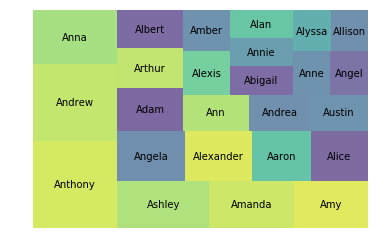

In [19]:
# libraries
import matplotlib 
from matplotlib import style
import matplotlib.pyplot as plt
import squarify    # use !pip install squarify (necessary for treemap)
# If you have 2 lists

squarify.plot(sizes=bpd[1], label=bpd[0], alpha=.7)
plt.axis('off')
plt.show() 


### 3.3 Modify the above mapper function to produce a key, value pair for words that contains the given subword say 'an' in all the words

In [20]:
# mapper function which reads each line in the file on certain condition and returns the key value pairs
def mapper2(string, filename):
    collector = defaultdict(list) # dictionary to collect the number of occurences grouped by 
    
    for line in open(filename).readlines(): # read each line of the file
        name = re.split(',',line)[0]  # as the file format is near csv and first value is name
        if string in name: # if the name contains the given string then append to dictionary as key and number of occurences as value
            collector[name].append(re.split(',',line)[2])

    for key,value in collector.items():
        yield ("total_name_count",(key,sum(list(map(int, value)))))        
        

In [21]:
# reducer function which yields most 'n' common words being used.
def reducer2(n, key, wordNcounts):
    word_counts = Counter()
    # using a counter to add each count for the given word
    for word, count in wordNcounts:
        word_counts[word] += count
    
    # yield the 'n' most common words along with their counts.
    yield (word_counts.most_common(n)  )
    
    
    

In [22]:
mapper = partial(mapper2,'an')
reducer = partial(reducer2, 15)
top_name_counts = map_reduce(documents_all, mapper, reducer)
print(top_name_counts)



[[('Daniel', 1915517), ('Brian', 1168503), ('Susan', 1123983), ('Nancy', 1004956), ('Ryan', 947787), ('Frank', 914943), ('Sandra', 876205), ('Jonathan', 837403), ('Amanda', 787025), ('Brandon', 757774), ('Stephanie', 741923), ('Alexander', 665492), ('Frances', 594325), ('Samantha', 571862), ('Janet', 557448)]]
